In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


In [45]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

#dropping the sl_no column as it is not useful
df = df.drop(columns=['sl_no'],axis=1)

#mapping the target column
status_map = {'Not Placed': 0, 'Placed': 1}
df['status'] = df['status'].map(status_map)

## EDA

In [46]:
df.columns  

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [47]:
categorical_columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

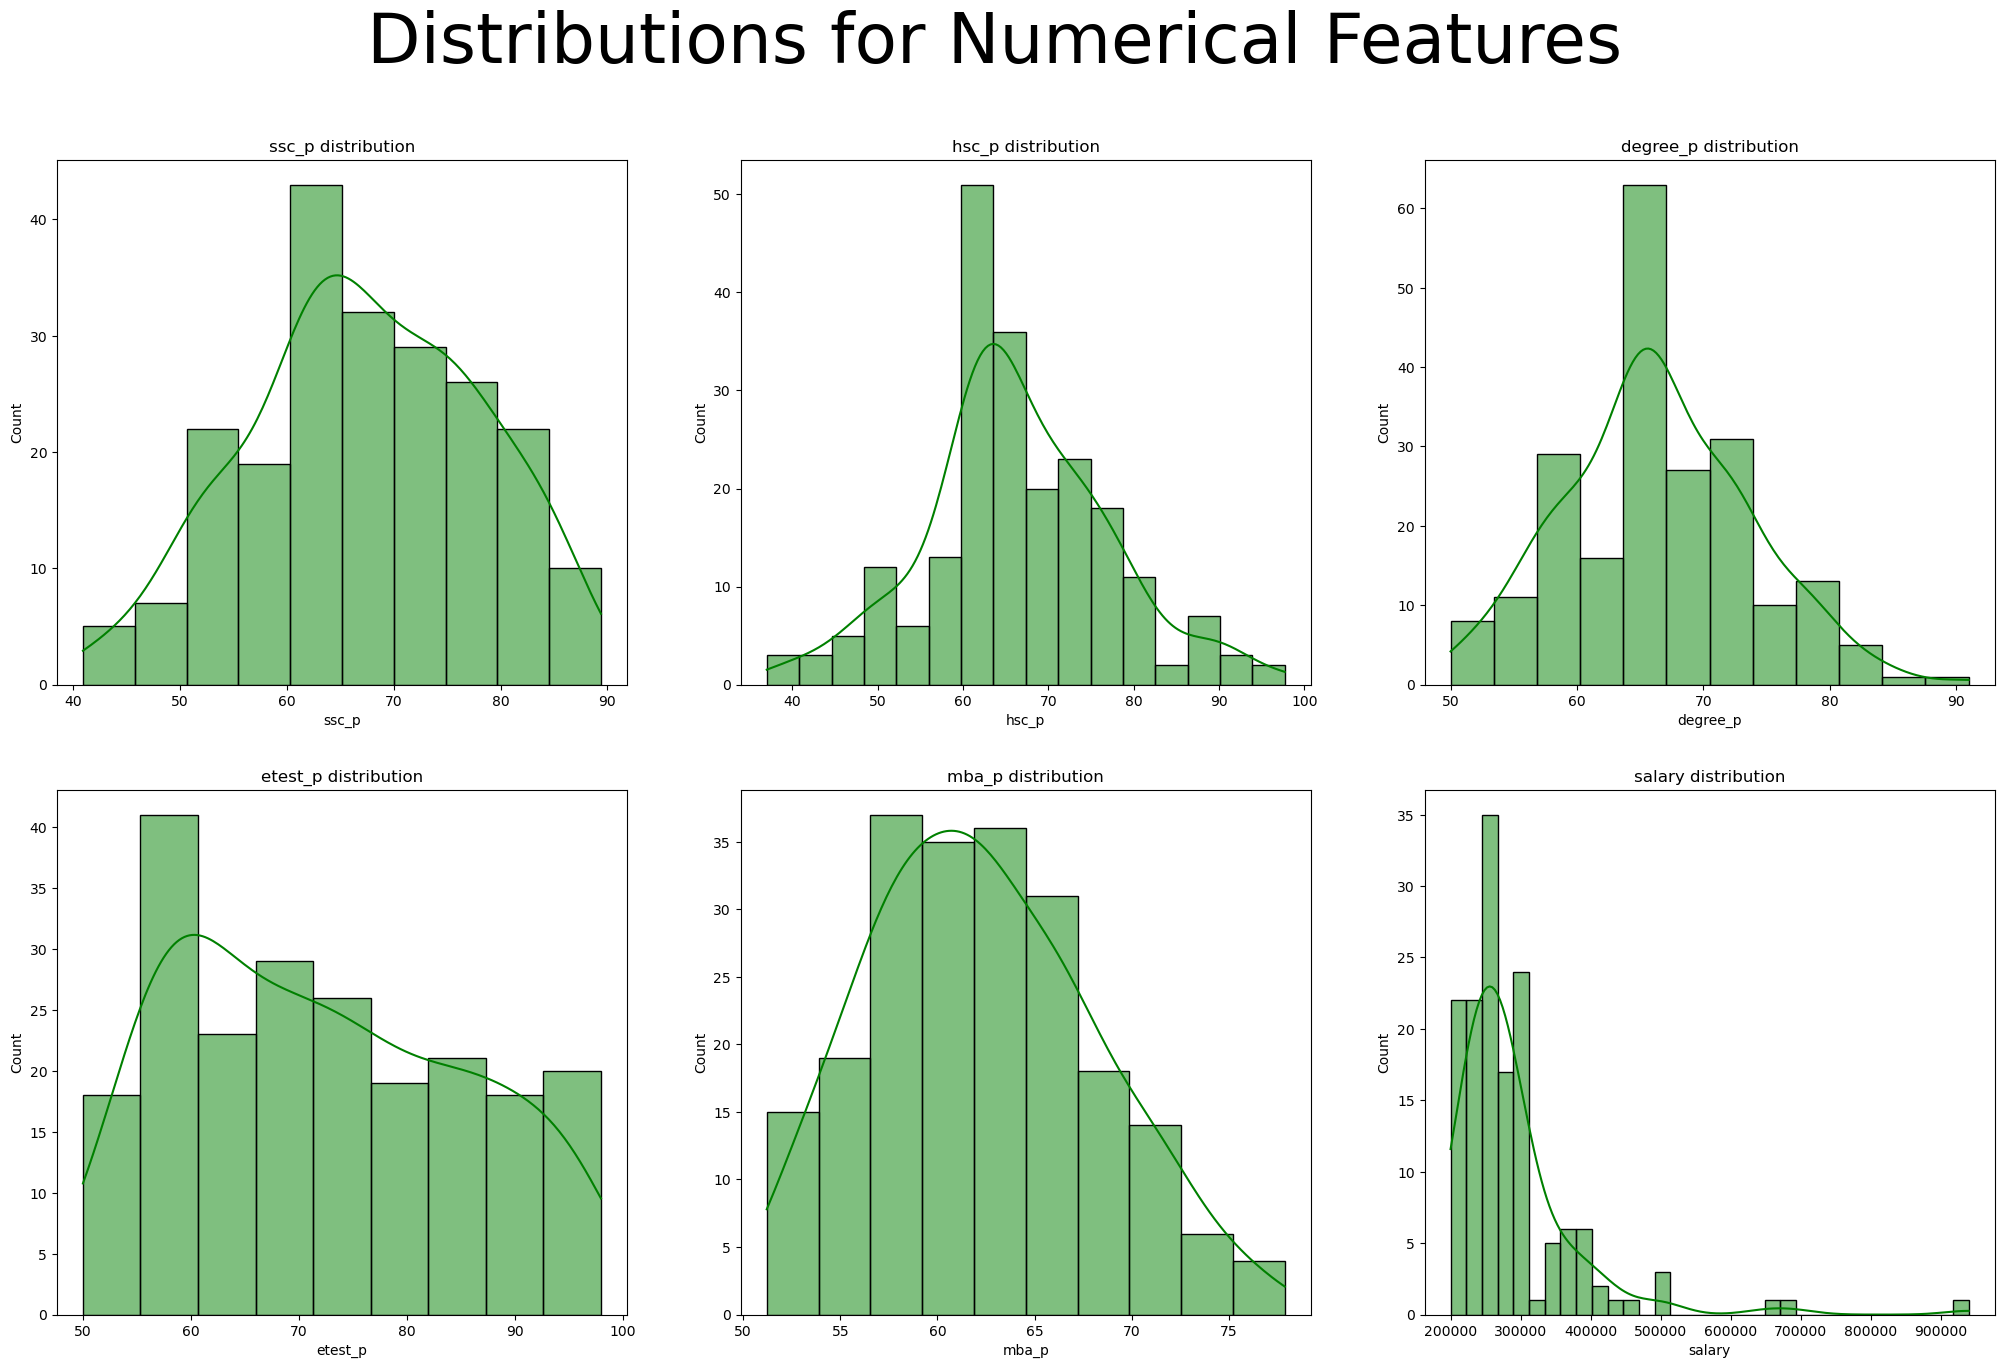

In [48]:
plt.figure(figsize=(25,15))
plt.suptitle("Distributions for Numerical Features",fontsize=50)
for i,column in enumerate(numerical_columns):
    plt.subplot(2,3,i+1)
    sns.histplot(df[column],kde=True,color='green')
    plt.title('{} distribution'.format(column))
plt.show()

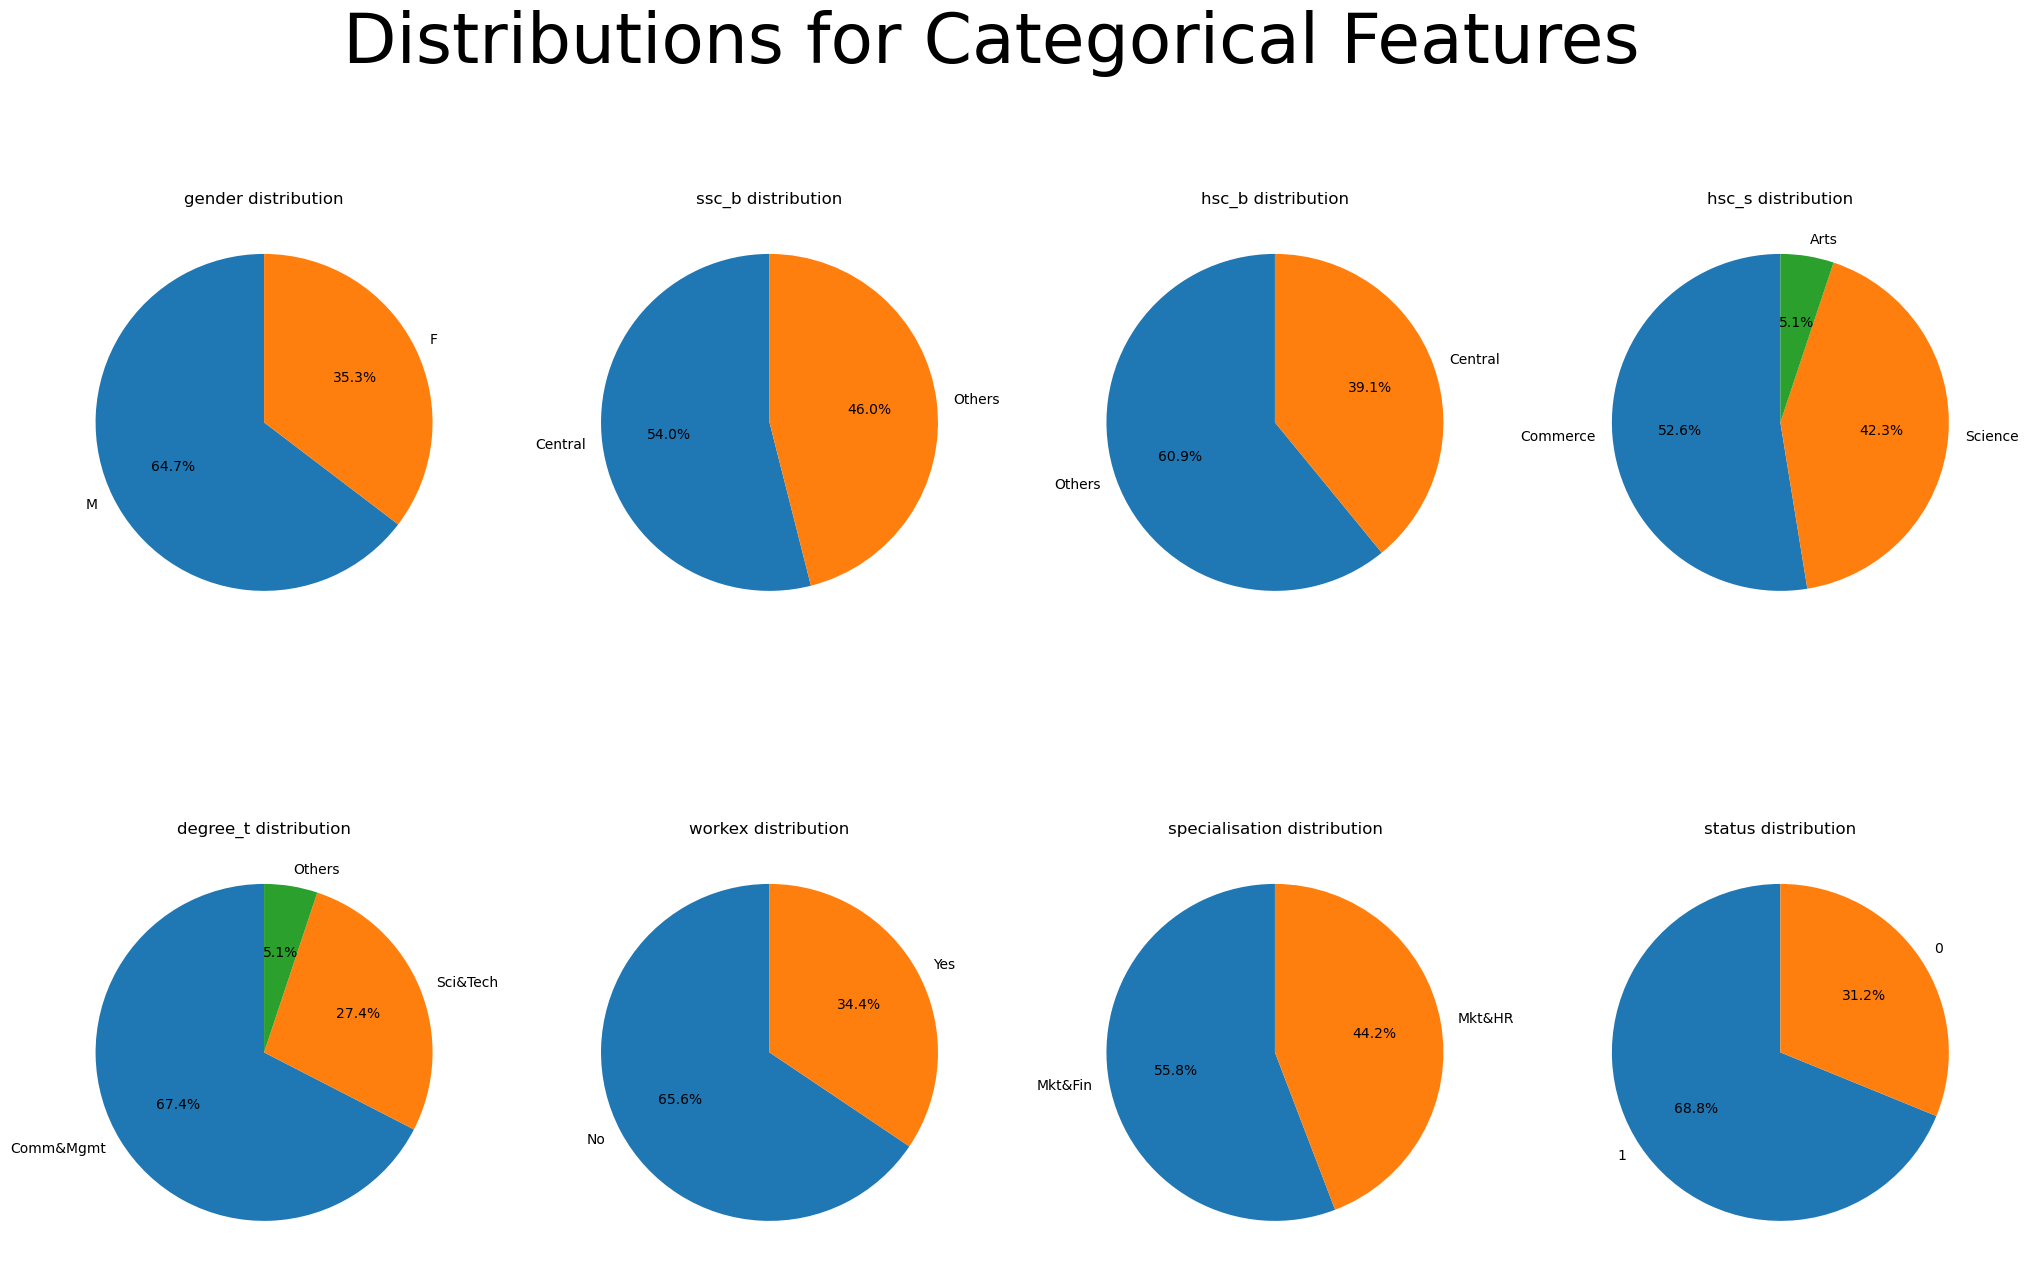

In [49]:
plt.figure(figsize=(25,15))
plt.suptitle("Distributions for Categorical Features",fontsize=50)
for i,column in enumerate(categorical_columns):
    plt.subplot(2,4,i+1)
    counts = df[column].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%', startangle=90)
    plt.title('{} distribution'.format(column))
    
plt.show()
    

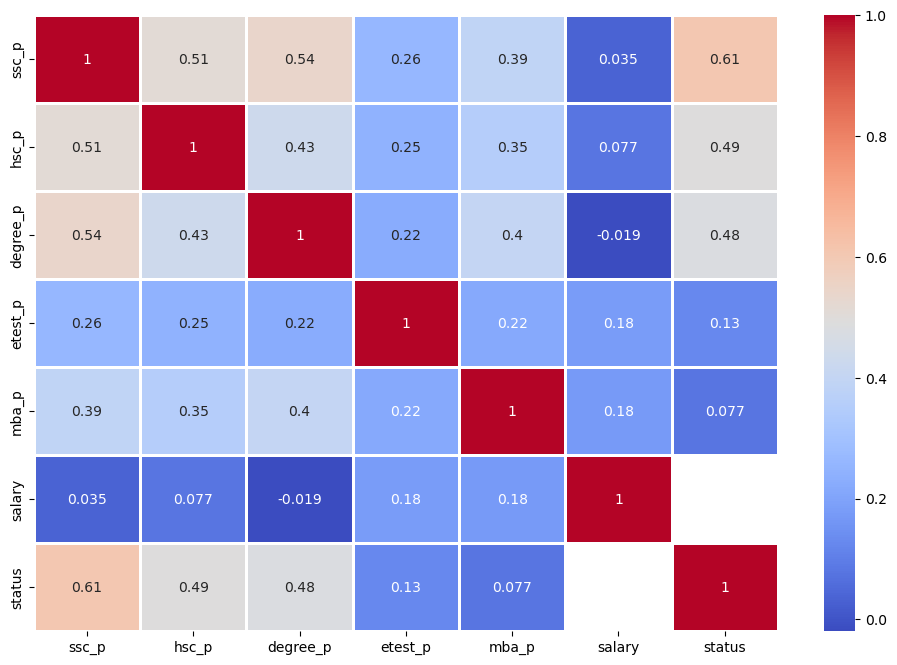

In [50]:
#Correlation 
df_for_corr = df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary','status']]
plt.figure(figsize=(12,8)) 
sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm', linewidths = 2)
plt.show()

## Interesting finding : The correlation of salary and placement status is 0, upon looking at value counts of placement status and values where salaries were null, it was found that wherever the salary was null, placement status was 0, meaning no salary was given to the candidate by corporate which makes sense as the column description says "Salary offered by corporate to candidates". Therefore, if we drop the null values, we will get 100% accuracy because we will only have one class. Which is why, we will impute null salaries with a value of 0.

In [51]:
df[df['salary'].isnull()]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,0,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,0,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,0,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,0,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0,NaN
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,0,NaN
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,0,NaN
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,0,NaN


In [52]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [53]:
#filling null values for salary with 0
df['salary'] = df['salary'].fillna(0)

## Data Encoding Categorical Columns

In [54]:
# columns to binary (0/1) encode => gender,ssc_b,hsc_b,workex,specialisation
# columns to one hot encode => hsc_s,degree_t

In [55]:
map_gender = {'M': 0, 'F': 1}
map_ssc_b = {'Others': 0, 'Central': 1}
map_hsc_b = {'Others': 0, 'Central': 1}
map_workex = {'No': 0, 'Yes': 1}
map_specialisation = {'Mkt&HR': 0, 'Mkt&Fin': 1}

df['gender'] = df['gender'].map(map_gender)
df['ssc_b'] = df['ssc_b'].map(map_ssc_b)
df['hsc_b'] = df['hsc_b'].map(map_hsc_b)
df['workex'] = df['workex'].map(map_workex)
df['specialisation'] = df['specialisation'].map(map_specialisation)

In [56]:
#one hot encoding

one_hot_cols = ['hsc_s','degree_t']
for col in one_hot_cols:
    dummy_column_df = pd.get_dummies(df[col],prefix='one_hot_')*1
    df = df.drop(col,axis=1)
    df = pd.concat([df,dummy_column_df],axis=1)


## Train Test Split and Scaling the data

In [57]:
X = df.drop('status',axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,salary,one_hot__Arts,one_hot__Commerce,one_hot__Science,one_hot__Comm&Mgmt,one_hot__Others,one_hot__Sci&Tech
0,0,67.00,0,91.00,0,58.00,0,55.0,0,58.80,270000.0,0,1,0,0,0,1
1,0,79.33,1,78.33,0,77.48,1,86.5,1,66.28,200000.0,0,0,1,0,0,1
2,0,65.00,1,68.00,1,64.00,0,75.0,1,57.80,250000.0,1,0,0,1,0,0
3,0,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0.0,0,0,1,0,0,1
4,0,85.80,1,73.60,1,73.30,0,96.8,1,55.50,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,77.60,0,91.0,1,74.49,400000.0,0,1,0,1,0,0
211,0,58.00,0,60.00,0,72.00,0,74.0,1,53.62,275000.0,0,0,1,0,0,1
212,0,67.00,0,67.00,0,73.00,1,59.0,1,69.72,295000.0,0,1,0,1,0,0
213,1,74.00,0,66.00,0,58.00,0,70.0,0,60.23,204000.0,0,1,0,1,0,0


## Training different neural network architectures

In [61]:
model_architecture_options = {
    'model_1' : MLPClassifier(hidden_layer_sizes=(17,17,17,17),max_iter=200),
    'model_2' : MLPClassifier(hidden_layer_sizes=(5,5,23,25),max_iter=200),
    'model_3' : MLPClassifier(hidden_layer_sizes=(17,17,8,8,17,17),max_iter=200),
    'model_4' : MLPClassifier(hidden_layer_sizes=(8,8,17,17,8),max_iter=200)
}

In [62]:
for model_type in model_architecture_options:

    model = model_architecture_options[model_type]
    model.fit(X_train,y_train)

    preds = model.predict(X_test)
    


    print(f'Confusion Matrix: \n{confusion_matrix(preds, y_test)}\n')
    print(f'Classification Report: \n{classification_report(preds, y_test)}\n')
    print(f'Accuracy Score: \n{accuracy_score(preds, y_test)}\n')

    #model_metrics[str(model)] = {confusion_matrix : confusion_matrix(preds, y_test),classification_report:classification_report(preds, y_test),accuracy_score:accuracy_score(preds, y_test)}
    print('***********************************************')

Confusion Matrix: 
[[15  1]
 [ 1 26]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.96      0.96      0.96        27

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43


Accuracy Score: 
0.9534883720930233

***********************************************


c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix: 
[[16  1]
 [ 0 26]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        26

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.98        43
weighted avg       0.98      0.98      0.98        43


Accuracy Score: 
0.9767441860465116

***********************************************
Confusion Matrix: 
[[16  0]
 [ 0 27]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        27

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Accuracy Score: 
1.0

***********************************************
Confusion Matrix: 
[[15  2]
 [ 1 25]]

Classification Report: 


c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
